# Getting Started

Kaggle is a site where people create algorithms and compete against machine learning practitioners around the world. Your algorithm wins the competition if it's the most accurate on a particular data set. Kaggle is a fun way to practice your machine learning skills.

In this mission and the ones that follow, we're going to learn how to compete in Kaggle competitions. In this introductory mission we'll learn how to:

Approach a Kaggle competition
Explore the competition data and learn about the competition topic
Prepare data for machine learning
Train a model
Measure the accuracy of your model
Prepare and make your first Kaggle submission.
This course presumes you have an understanding of Python and the pandas library. If you need to learn about these, we recommend our Python and pandas courses.

Kaggle has created a number of competitions designed for beginners. The most popular of these competitions, and the one we'll be looking at, is about predicting which passengers survived the sinking of the Titanic.

In this competition, we have a data set of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not. Before we start looking at this specific competition, let's take a moment to understand how Kaggle competitions work.

Each Kaggle competition has two key data files that you will work with - a training set and a testing set.

The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, Survival.

The testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.

<img src='kaggle/fig1.svg'>

This is useful because we want as much data as we can to train our model on. Once we have trained our model on the training set, we will use that model to make predictions on the data from the testing set, and submit those predictions to Kaggle.

In this competition, the two files are named test.csv and train.csv. We'll start by using the pandas library to read both files and inspect their size.

<b>Instructions</b><br>
- Use pandas.read_csv() to import train.csv and assign it to the variable train.
- Use DataFrame.shape to calculate the number of rows and columns in train, and assign the result to train_shape.

In [1]:
import pandas as pd

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train_shape = train.shape

The files we read in the previous screen are available on the data page for the Titanic competition on Kaggle. That page also has a data dictionary, which explains the various columns that make up the data set. Below are the descriptions contained in that data dictionary:

- PassengerID - A column added by Kaggle to identify each row and make submissions easier
- Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex - The passenger's sex
- Age - The passenger's age in years
- SibSp - The number of siblings or spouses the passenger had aboard the Titanic
- Parch - The number of parents or children the passenger had aboard the Titanic
- Ticket - The passenger's ticket number
- Fare - The fare the passenger paid
- Cabin - The passenger's cabin number
- Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

The data page on Kaggle has some additional notes about some of the columns. It's always worth exploring this in detail to get a full understanding of the data.

The type of machine learning we will be doing is called classification, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing binary classification, which means that there are only two different states we are classifying.

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. Anyone who has watched the movie Titanic would remember that women and children were given preference to lifeboats (as they were in real life). You would also remember the vast class disparity of the passengers.

This indicates that Age, Sex, and PClass may be good predictors of survival. We'll start by exploring Sex and Pclass by visualizing the data.

Because the Survived column contains 0 if the passenger did not survive and 1 if they did, we can segment our data by sex and calculate the mean of this column. We can use DataFrame.pivot_table() to easily do this:

    sex_pivot = train.pivot_table(index="Sex",values="Survived")
    sex_pivot.plot.bar()
    plt.show()
    
The resultant plot will look like this:

<img src='kaggle/fig2.png'>

We can immediately see that females survived in much higher proportions than males did.

Let's do the same with the Pclass column.

<b>Instructions</b><br>
- Use DataFrame.pivot_table() to pivot the train dataframe:
- Use "Pclass" for the index parameter.
- Use "Survived" for the values parameter.
- Use DataFrame.plot.bar() to plot the pivot table.

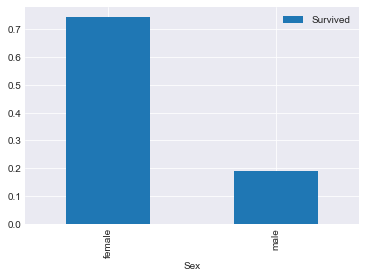

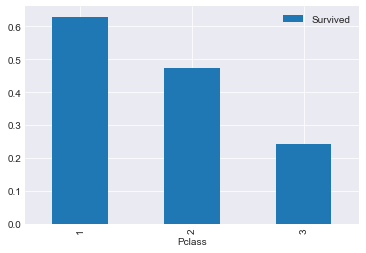

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

class_pivot = train.pivot_table(index='Pclass', values='Survived')
class_pivot.plot.bar()
plt.show()

The Sex and PClass columns are what we call categorical features. That means that the values represented a few separate options (for instance, whether the passenger was male or female).

Let's take a look at the Age column using Series.describe(). You can run this code for yourself in the console, if you wish.


    >>> train["Age"].describe()

    count    714.000000
    mean      29.699118
    std       14.526497
    min        0.420000
    25%       20.125000
    50%       28.000000
    75%       38.000000
    max       80.000000
    Name: Age, dtype: float64

The Age column contains numbers ranging from 0.42 to 80.0 (If you look at Kaggle's data page, it informs us that Age is fractional if the passenger is less than one). The other thing to note here is that there are 714 values in this column, fewer than the 814 rows we discovered that the train data set had earlier in this mission which indicates we have some missing values.

All of this means that the Age column needs to be treated slightly differently, as this is a continuous numerical column. One way to look at distribution of values in a continuous numerical set is to use histograms. We can create two histograms to compare visually the those that survived vs those who died across different age ranges:


    survived = train[train["Survived"] == 1]
    died = train[train["Survived"] == 0]
    survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
    died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
    plt.legend(['Survived','Died'])
    plt.show()

The resultant plot will look like this:

<img src='kaggle/fig3.png'>

The relationship here is not simple, but we can see that in some age ranges more passengers survived - where the red bars are higher than the blue bars.

In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges. We can use the pandas.cut() function to help us out.

The pandas.cut() function has two required parameters - the column we wish to cut, and a list of numbers which define the boundaries of our cuts. We are also going to use the optional parameter labels, which takes a list of labels for the resultant bins. This will make it easier for us to understand our results.

Before we modify this column, we have to be aware of two things. Firstly, any change we make to the train data, we also need to make to the test data, otherwise we will be unable to use our model to make predictions for our submissions. Secondly, we need to remember to handle the missing values we observed above.

In the example below, we create a function that:

- uses the pandas.fillna() method to fill all of the missing values with -0.5
- cuts the Age column into three segments: Missing, Child, and Adult using pandas.cut().

We then use that function on both the train and test dataframes.

    def process_age(df,cut_points,label_names):
        df["Age"] = df["Age"].fillna(-0.5)
        df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
        return df

    cut_points = [-1,0,18,100]
    label_names = ["Missing","Child","Adult"]

    train = process_age(train,cut_points,label_names)
    test = process_age(test,cut_points,label_names)
    
The diagram below shows how the function converts the data:

<img src='kaggle/fig4.svg'>

Note that the cut_points list has one more element than the label_names list, since it needs to define the upper boundary for the last segment.

<b>Instructions</b><br>
- Create the cut_points and label_names lists to split the Age column into six categories:
    - Missing, from -1 to 0
    - Infant, from 0 to 5
    - Child, from 5 to 12
    - Teenager, from 12 to 18
    - Young Adult, from 18 to 35
    - Adult, from 35 to 60
    - Senior, from 60 to 100
- Apply the process_age() function on the train dataframe, assigning the result to train.
- Apply the process_age() function on the test dataframe, assigning the result to test.
- Use DataFrame.pivot_table() to pivot the train dataframe by the Age_categories column.
- Use DataFrame.plot.bar() to plot the pivot table.

In [5]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

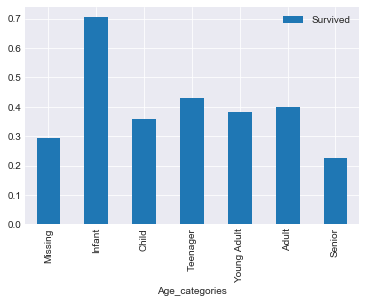

In [6]:
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
cut_labels = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

train = process_age(train, cut_points, cut_labels)
test = process_age(test, cut_points, cut_labels)

age_cat_pivot = train.pivot_table(index='Age_categories', values='Survived')
age_cat_pivot.plot.bar()
plt.show()

So far we have identified three columns that may be useful for predicting survival:

- Sex
- Pclass
- Age, or more specifically our newly created Age_categories

Before we build our model, we need to prepare these columns for machine learning. Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers.

Additionally, we need to be careful that we don't imply any numeric relationship where there isn't one. If we think of the values in the Pclass column, we know they are 1, 2, and 3. You can confirm this by running the following code in your console:

    >>> train["Pclass"].value_counts()
    
While the class of each passenger certainly has some sort of ordered relationship, the relationship between each class is not the same as the relationship between the numbers 1, 2, and 3. For instance, class 2 isn't "worth" double what class 1 is, and class 3 isn't "worth" triple what class 1 is.

In order to remove this relationship, we can create dummy columns for each unique value in Pclass:

<img src='kaggle/fig5.svg'>


Rather than doing this manually, we can use the pandas.get_dummies() function, which will generate columns shown in the diagram above.

The following code creates a function to create the dummy columns for the Pclass column and add it back to the original dataframe. It then applies that function the train and test dataframes.

    def create_dummies(df,column_name):
        dummies = pd.get_dummies(df[column_name],prefix=column_name)
        df = pd.concat([df,dummies],axis=1)
        return df

    train = create_dummies(train,"Pclass")
    test = create_dummies(test,"Pclass")
    
Let's use that function to create dummy columns for both the Sex and Age_categories columns.

<b>Instructions</b><br>
- Use the create_dummies() function to create dummy variables for the Sex column:
    - in the train dataframe.
    - in the test dataframe.
- Use the create_dummies() function to create dummy variables for the Age_categories column:
    - in the train dataframe.
    - in the test dataframe.

In [7]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df,dummies], axis=1)
    return df

In [8]:
train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train = create_dummies(train, ['Sex', 'Age_categories'])
test = create_dummies(test, ['Sex', 'Age_categories'])

Now that our data has been prepared, we are ready to train our first model. The first model we will use is called Logistic Regression, which is often the first model you will train when performing classification.

We will be using the scikit-learn library as it has many tools that make performing machine learning easier. The scikit-learn workflow consists of four main steps:

Instantiate (or create) the specific machine learning model you want to use
Fit the model to the training data
Use the model to make predictions
Evaluate the accuracy of the predictions
Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of. In our case, we want to use the LogisticRegression class.

We'll start by looking at the first two steps. First, we need to import the class:

    from sklearn.linear_model import LogisticRegression

Next, we create a LogisticRegression object:

    lr = LogisticRegression()

Lastly, we use the LogisticRegression.fit() method to train our model. The .fit() method accepts two arguments: X and y. X must be a two dimensional array (like a dataframe) of the features that we wish to train our model on, and y must be a one-dimensional array (like a series) of our target, or the column we wish to predict.

    columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
    lr.fit(train[columns], train['Survived'])

The code above fits (or trains) our LogisticRegression model using three columns: Pclass_2, Pclass_3, and Sex_male.

Let's train our model using all of the columns we created in the previous screen.

<b>Instructions</b><br>
- Instantiate a LogisticRegression object called lr.
- Use LogisticRegression.fit() to fit the model on the train dataset using:
- The columns contained in columns as the first (X) parameter.
- The Survived column as the second (y) parameter.

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Congratulations, you've trained your first machine learning model! Our next step is to find out how accurate our model is, and to do that, we'll have to make some predictions.

If you recall from earlier, we do have a test dataframe that we could use to make predictions. We could make predictions on that data set, but because it doesn't have the Survived column we would have to submit it to Kaggle to find out our accuracy. This would quickly become a pain if we had to submit to find out the accuracy every time we optimized our model.

We could also fit and predict on our train dataframe, however if we do this there is a high likelihood that our model will overfit, which means it will perform well because we're testing on the same data we've trained on, but then perform much worse on new, unseen data.

Instead we can split our train dataframe into two:

- One part to train our model on (often 80% of the observations)
- One part to make predictions with and test our model (often 20% of the observations)

The convention in machine learning is to call these two parts train and test. This can become confusing, since we already have our test dataframe that we will eventually use to make predictions to submit to Kaggle. To avoid confusion, from here on, we're going to call this Kaggle 'test' data holdout data, which is the technical name given to this type of data used for final predictions.

The scikit-learn library has a handy model_selection.train_test_split() function that we can use to split our data. train_test_split() accepts two parameters, X and y, which contain all the data we want to train and test on, and returns four objects: train_X, train_y, test_X, test_y:

<img src='kaggle/fig6.svg'>

Here's what the syntax for creating these four objects looks like:

    from sklearn.model_selection import train_test_split
    
    columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
    
    all_X = train[columns]
    all_y = train['Survived']
    
    train_X, test_X, train_y, test_y = train_test_split(
        all_X, all_y, test_size=0.2,random_state=0)

You'll notice that there are two other parameters we used: test_size, which lets us control what proportions our data are split into, and random_state. The train_test_split() function randomizes observations before dividing them, and setting a random seed means that our results will be reproducible, which is important if you are collaborating, or need to produce consistent results each time (which our answer checker requires).

<b>Instructions</b><br>
- Use the model_selection.train_test_split() function to split the train dataframe using the following parameters:
    - test_size of 0.2.
    - random_state of 0.
- Assign the four returned objects to train_X, test_X, train_y, and test_y.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

X = train[columns]
y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

Now that we have our data split into train and test sets, we can fit our model again on our training set, and then use that model to make predictions on our test set.

Once we have fit our model, we can use the LogisticRegression.predict() method to make predictions.

The predict() method takes a single parameter X, a two dimensional array of features for the observations we wish to predict. X must have the exact same features as the array we used to fit our model. The method returns single dimensional array of predictions.

    lr = LogisticRegression()
    lr.fit(train_X, train_y)
    predictions = lr.predict(test_X)

There are a number of ways to measure the accuracy of machine learning models, but when competing in Kaggle competitions you want to make sure you use the same method that Kaggle uses to calculate accuracy for that specific competition.

In this case, the evaluation section for the Titanic competition on Kaggle tells us that our score calculated as "the percentage of passengers correctly predicted". This is by far the most common form of accuracy for binary classification.

As an example, imagine we were predicting a small data set of five observations.

<img src='kaggle/fig7.jpg', height=840, width=472>

In this case, our model correctly predicted three out of five values, so the accuracy based on this prediction set would be 60%.

Again, scikit-learn has a handy function we can use to calculate accuracy: metrics.accuracy_score(). The function accepts two parameters, y_true and y_pred, which are the actual values and our predicted values respectively, and returns our accuracy score.

    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(test_y, predictions)

Let's put all of these steps together, and get our first accuracy score.

<b>Instructions</b><br>
- Instantiate a new LogisticRegression() object, lr.
- Fit the model using train_X and train_y.
- Make predictions using test_X and assign the results to predictions.
- Use accuracy_score() to compare test_y and predictions, assigning the result to accuracy
- Print the accuracy variable.

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.8100558659217877


Our model has an accuracy score of 81.0% when tested against our 20% test set. Given that this data set is quite small, there is a good chance that our model is overfitting, and will not perform as well on totally unseen data.

To give us a better understanding of the real performance of our model, we can use a technique called cross validation to train and test our model on different splits of our data, and then average the accuracy scores.

<img src='kaggle/fig8.svg'>

The most common form of cross validation, and the one we will be using, is called k-fold cross validation. 'Fold' refers to each different iteration that we train our model on, and 'k' just refers to the number of folds. In the diagram above, we have illustrated k-fold validation where k is 5.

We will use scikit-learn's model_selection.cross_val_score() function to automate the process. The basic syntax for cross_val_score() is:

    cross_val_score(estimator, X, y, cv=None)

- estimator is a scikit-learn estimator object, like the LogisticRegression() objects we have been creating.
- X is all features from our data set.
- y is the target variables.
- cv specifies the number of folds.

The function returns a numpy ndarray of the accuracy scores of each fold.

It's worth noting, the cross_val_score() function can use a variety of cross validation techniques and scoring types, but it defaults to k-fold validation and accuracy scores for our input types.

<b>Instructions</b><br>
- Instantiate a new LogisticRegression() object, lr.
- Use model_selection.cross_val_score() to perform cross-validation on our data and assign the results to scores:
    - Use the newly created lr as the estimator.
    - Use all_X and all_y as the input data.
    - Specify 10 folds to be used.
- Use the numpy.mean() function to calculate the mean of scores and assign the result to accuracy.
- Print the variables scores and accuracy.

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [16]:
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10)
accuracy = np.mean(scores)
print('Accuracy:', accuracy)
print(scores)

Accuracy: 0.8024670865963002
[0.8        0.81111111 0.7752809  0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80681818]


From the results of our k-fold validation, you can see that the accuracy number varies with each fold - ranging between 76.4% and 87.6%. This demonstrates why cross validation is important.

As it happens, our average accuracy score was 80.2%, which is not far from the 81.0% we got from our simple train/test split, however this will not always be the case, and you should always use cross-validation to make sure the error metrics you are getting from your model are accurate.

We are now ready to use the model we have built to train our final model and then make predictions on our unseen holdout data, or what Kaggle calls the 'test' data set.

<b>Instructions</b><br>
- Instantiate a new LogisticRegression() object, lr.
- Use the fit() method to train the model lr using all of the Kaggle training data: all_X and all_y.
- Make predictions using the holdout data and assign the result to holdout_predictions.

In [17]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr = LogisticRegression()
lr.fit(X, y)
holdout_predictions = lr.predict(holdout[columns])

The last thing we need to do is create a submission file. Each Kaggle competition can have slightly different requirements for the submission file. Here's what is specified on the Titanic competition evaluation page:

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

We will need to create a new dataframe that contains the holdout_predictions we created in the previous screen and the PassengerId column from the holdout dataframe. We don't need to worry about matching the data up, as both of these remain in their original order.

To do this, we can pass a dictionary to the pandas.DataFrame() function:

    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                     "Survived": holdout_predictions}
    submission = pd.DataFrame(submission_df)

Finally, we'll use the DataFrame.to_csv() method to save the dataframe to a CSV file. We need to make sure the index parameter is set to False, otherwise we will add an extra column to our CSV.

<b>Instructions</b><br>
- Create a dataframe submission that matches Kaggle's specification.
- Use the to_csv() method to save the submission dataframe using the filename submission.csv, using the documentation to look up the correct syntax.

In [18]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv('submission.csv', index=False)

You can download the submission file you just created here (when working locally, it will be in the same directory as your notebook).

Now that we have our submission file, we can start our submission to Kaggle by clicking the blue 'Submit Predictions' button on the competition page.

<img src='kaggle/fig9.jpg'>

You will then be prompted to upload your CSV file, and add a brief description of your submission. When you make your submission, Kaggle will process your predictions and give you your accuracy for the holdout data and your ranking. When it is finished processing you will see our first submission gets an accuracy score of 0.75598, or 75.6%.

<img src='kaggle/fig10.png'>

The fact that our accuracy on the holdout data is 75.6% compared with the 80.2% accuracy we got with cross-validation indicates that our model is overfitting slightly to our training data.

At the time of writing, accuracy of 75.6% gives a rank of 6,663 out of 7,954. It's easy to look at Kaggle leaderboards after your first submission and get discouraged, but keep in mind that this is just a starting point.

It's also very common to see a small number of scores of 100% at the top of the Titanic leaderboard and think that you have a long way to go. In reality, anyone scoring about 90% on this competition is likely cheating (it's easy to look up the names of the passengers in the holdout set online and see if they survived).

There is a great analysis on Kaggle, How am I doing with my score, which uses a few different strategies and suggests a minimum score for this competition is 62.7% (achieved by presuming that every passenger died) and a maximum of around 82%. We are a little over halfway between the minimum and maximum, which is a great starting point.

# Feature Preparation, Selection, and Engineering

In the last mission, we made our first submission to Kaggle, getting an accuracy score of 75.6%. While this is a good start, there is definitely room for improvement. There are two main areas we can focus on to boost the accuracy of our predictions:

Improving the features we train our model on
Improving the model itself
In this mission, we're going to focus working with the features used in our model.

We'll start by looking at feature selection. Feature selection is important because it helps to exclude features which are not good predictors, or features that are closely related to each other. Both of these will cause our model to be less accurate, particularly on previously unseen data.

The diagram below illustrates this. The red dots represent the data we are trying to predict, and each of the blue lines represents a different model.

<img src='kaggle/fig11.svg'>

represents the training data too closely, and is unlikely to predict well on unseen data, like the holdout data for our Kaggle competition.

The model on the right is well-fit. It captures the underlying pattern in the data without the detailed noise found just in the training set. A well fit model is likely to make accurate predictions on previously unseen data. The key to creating a well-fit model is to select the right balance of features, and to create new features to train your model.

In the previous mission, we trained our model using data about the age, sex and class of the passengers on the Titanic. Let's start by using the functions we created in that mission to add the columns we had at the end of the first mission.

Remember that any modifications we make to our training data (train.csv) we also have to make to our holdout data (test.csv).

<b>Instructions</b><br>
- Use the process_age() function:
    - To convert the Age column in train, assigning the result to train.
    - To convert the Age column in holdout, assigning the result to holdout.
- Create a for loop which iterates over the column names "Age_categories", "Pclass", and "Sex". In each iteration:
    - Use the create_dummies() function to process the train dataframe for the given column, assigning the result to train.
    - Use the create_dummies() function to process the holdout dataframe for the given column, assigning the result to holdout.
- Use the print() function to display the columns in train using train.columns.

In [19]:
# These are already loaded in above

In [20]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior'],
      dtype='object')


Our model in the previous mission was based on three columns from the original data: Age, Sex, and Pclass. As you saw when you printed the column names in the previous screen, there are a number of other columns that we haven't yet used. To make it easier to reference, the output from the previous screen is copied below:

    Index(['PassengerId', 'Survived', 'Pclass', 'Name',
           'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
           'Fare', 'Cabin', 'Embarked', 'Age_categories',
           'Age_categories_Missing',
           'Age_categories_Infant',
           'Age_categories_Child',
           'Age_categories_Teenager',
           'Age_categories_Young Adult',
           'Age_categories_Adult',
           'Age_categories_Senior', 'Pclass_1',
           'Pclass_2', 'Pclass_3','Sex_female',
           'Sex_male'], dtype='object')

The last nine rows of the output are dummy columns we created, but in the first three rows we can see there are a number of features we haven't yet utilized. We can ignore PassengerId, since this is just a column Kaggle have added to identify each passenger and calculate scores. We can also ignore Survived, as this is what we're predicting, as well as the three columns we've already used.

Here is a list of the remaining columns (with a brief description), so we can refamiliarize ourselves with the data.

- SibSp - The number of siblings or spouses the passenger had aboard the Titanic
- Parch - The number of parents or children the passenger had aboard the Titanic
- Ticket - The passenger's ticket number
- Fare - The fair the passenger paid
- Cabin - The passengers cabin number
- Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

At first glance, both the Name and Ticket columns look to be unique to each passenger. We will come back to these columns later, but for now we'll focus on the other columns.

We can use the Dataframe.describe() method to give us some more information on the values within each remaining column.


    >>> columns = ['SibSp','Parch','Fare','Cabin','Embarked']
    >>> train[columns].describe(include='all',percentiles=[])
                     SibSp       Parch        Fare Cabin Embarked
        count   891.000000  891.000000  891.000000   204      889
        unique         NaN         NaN         NaN   147        3
        top            NaN         NaN         NaN    G6        S
        freq           NaN         NaN         NaN     4      644
        mean      0.523008    0.381594   32.204208   NaN      NaN
        std       1.102743    0.806057   49.693429   NaN      NaN
        min       0.000000    0.000000    0.000000   NaN      NaN
        50%       0.000000    0.000000   14.454200   NaN      NaN
        max       8.000000    6.000000  512.329200   NaN      NaN

Of these, SibSp, Parch and Fare look to be standard numeric columns with no missing values. Cabin has values for only 204 of the 891 rows, and even then most of the values are unique, so for now we will leave this column also. Embarked looks to be a standard categorical column with 3 unique values, much like PClass was, except that there are two missing values. We can easily fill these two missing values with the most common value, "S" which occurs 644 times.

Looking at our numeric columns, we can see a big difference between the range of each. SibSp has values between 0-8, Parch between 0-6, and Fare is on a dramatically different scale, with values ranging from 0-512. In order to make sure these values are equally weighted within our model, we'll need to rescale the data.

Rescaling simply stretches or shrinks the data as needed to be on the same scale, in our case between 0 and 1.

<img src='kaggle/fig12.svg'>

In the diagram above, the three columns have different minimum and maximum values before rescaling.

After rescaling, the values in each feature has been compressed or stretched so that they are all on the same scale - they have the same minimum and maximum, and the relationship between each point is still the same relative other points in that feature. You can now easily see that the data represented in each column is identical.

Within scikit-learn, the preprocessing.minmax_scale() function allows us to quickly and easily rescale our data:

    from sklearn.preprocessing import minmax_scale
    columns = ["column one", "column two"]
    data[columns] = min_max_scale(data[columns])

Let's process the Embarked, SibSp, Parch and Fare columns in both our train and holdout dataframes.

<b>Instructions</b><br>
- For both the train and holdout dataframes:
- Use the Series.fillna() method to replace any missing values in the Embarked column with "S"
- Use our create_dummies() function to create dummy columns for the Embarked column.
- Use minmax_scale() to rescale the SibSp, Parch, and Fare columns, assigning the results back to new columns SibSp_scaled, Parch_scaled. and Fare_scaled respectively.

In [21]:
from sklearn.preprocessing import minmax_scale

In [22]:
# The holdout set has a missing value in the Fare column which
# we'll fill with the mean.

holdout["Fare"] = holdout["Fare"].fillna(train["Fare"].mean())
train['Embarked'] = train['Embarked'].fillna('S')
holdout['Embarked'] = holdout['Embarked'].fillna('S')

train = create_dummies(train, 'Embarked')
holdout = create_dummies(holdout, 'Embarked')

train['SibSp_scaled'] = minmax_scale(train['SibSp'])
train['Parch_scaled'] = minmax_scale(train['Parch'])
train['Fare_scaled'] = minmax_scale(train['Fare'])

holdout['SibSp_scaled'] = minmax_scale(holdout['SibSp'])
holdout['Parch_scaled'] = minmax_scale(holdout['Parch'])
holdout['Fare_scaled'] = minmax_scale(holdout['Fare'])

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In order to select the best-performing features, we need a way to measure which of our features are relevant to our outcome - in this case, the survival of each passenger. One effective way is by training a logistic regression model using all of our features, and then looking at the coefficients of each feature.

The scikit-learn LogisticRegression class has an attribute in which coefficients are stored after the model is fit, LogisticRegression.coef_. We first need to train our model, after which we can access this attribute.

    lr = LogisticRegression()
    lr.fit(train_X,train_y)
    coefficients = lr.coef_

The coef() method returns a NumPy array of coefficients, in the same order as the features that were used to fit the model. To make these easier to interpret, we can convert the coefficients to a pandas series, adding the column names as the index:

    feature_importance = pd.Series(coefficients[0],
                                   index=train_X.columns)

We'll now fit a model and plot the coefficients for each feature.

<b>Instructions</b><br>
- Instantiate a LogisticRegression() object.
- Fit the LogisticRegression object using the columns from the list columns from the train dataframe and the target column Survived.
- Use the coef_ attribute to retrieve the coefficients of the features, and assign the results to coefficients.
- Create a series object using coefficients, with the feature column names as the index and assign it to feature_importance.
- Use the Series.plot.barh() method to plot the feature_importance series.

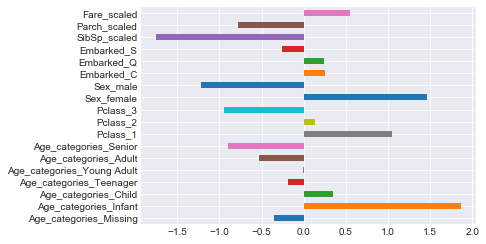

In [23]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])

coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0], index=columns)

feature_importance.plot.barh()

The plot we generated in the last screen showed a range of both positive and negative values. Whether the value is positive or negative isn't as important in this case, relative to the magnitude of the value. If you think about it, this makes sense. A feature that indicates strongly whether a passenger died is just as useful as a feature that indicates strongly that a passenger survived, given they are mutually exclusive outcomes.

To make things easier to interpret, we'll alter the plot to show all positive values, and have sorted the bars in order of size:

    ordered_feature_importance = feature_importance.abs().sort_values()
    ordered_feature_importance.plot.barh()
    plt.show()

<img src='kaggle/fig13.png'>

<b>Instructions</b><br>
- Instantiate a LogisticRegression() object.
- Use the model_selection.cross_val_score() function and assign the returned object to scores, using:
    - The columns specified in columns and all rows from the train dataframe.
    - A cv parameter of 10.
- Calculate the mean of the cross validation scores and assign the results to accuracy.
- Use the print() function to display the variable accuracy.

In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [25]:
columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

lr = LogisticRegression()
scores = cross_val_score(lr, train[columns], train['Survived'], cv=10)
accuracy = np.mean(scores)
print(accuracy)

0.8148019521053229


The cross validation score of 81.48% is marginally higher than the cross validation score for the model we created in the previous mission, which had a score of 80.2%.

Hopefully, this improvement will translate to previously unseen data. Let's train a model using the columns from the previous step, make some predictions on the holdout data and submit it to Kaggle for scoring.

<b>Instructions</b><br>
- Instantiate a LogisticRegression() object and fit it using all_X and all_y.
- Use the predict() method to make predictions using the same columns in the holdout dataframe, and assign the result to holdout_predictions
- Create a dataframe submission with two columns:
    - PassengerId, with the values from the PassengerId column of the holdout dataframe.
    - Survived, with the values from holdout_predictions.
- Use the DataFrame.to_csv method to save the submission dataframe to the filename submission_1.csv.

In [26]:
columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

all_X = train[columns]
all_y = train['Survived']

lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])

submission = pd.DataFrame({"PassengerId": holdout['PassengerId'],
                           "Survived": holdout_predictions})

submission.to_csv("submission1.csv", index=False)

When you submit it to Kaggle, you'll see that the store is 77.0%, which at the time of writing equates to jumping about 1,500 places up the leaderboard (this will vary as the leaderboard is always changing). It's only a small improvement, but we're moving in the right direction.

A lot of the gains in accuracy in machine learning come from Feature Engineering. Feature engineering is the practice of creating new features from your existing data.

One common way to engineer a feature is using a technique called binning. Binning is when you take a continuous feature, like the fare a passenger paid for their ticket, and separate it out into several ranges (or 'bins'), turning it into a categorical variable.

This can be useful when there are patterns in the data that are non-linear and you're using a linear model (like logistic regression). We actually used binning in the previous mission when we dealt with the Age column, although we didn't use the term.

Let's look at histograms of the Fare column for passengers who died and survived, and see if there are patterns that we can use when creating our bins.

<img src='kaggle/fig14.png'>

Looking at the values, it looks like we can separate the feature into four bins to capture some patterns from the data:

- 0-12
- 12-50
- 50-100
- 100+

Like in the previous mission, we can use the pandas.cut() function to create our bins.

<b>Instructions</b><br>
- Using the process_age() function as a model, create a function process_fare() that uses the pandas cut() method to create bins for the Fare column and assign the results to a new column called Fare_categories.
- We have already dealt with missing values in the Fare column, so you won't need the line that uses fillna().
- Use the process_fare() function on both the train and holdout dataframes, creating the four 'bins':
    - 0-12, for values between 0 and 12.
    - 12-50, for values between 12 and 50.
    - 50-100, for values between 50 and 100.
    - 100+, for values between 100 and 1000.
- Use the create_dummies() function we created earlier in the mission on both the train and holdout dataframes to create dummy columns based on our new fare bins.

In [27]:
def process_fare(df,cut_points,label_names):
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

In [28]:
train = process_fare(train, [0, 12, 50, 100, 1000], ['0-12', '12-50', '50-100', '100+'])
holdout = process_fare(holdout, [0, 12, 50, 100, 1000], ['0-12', '12-50', '50-100', '100+'])

train = create_dummies(train, 'Fare_categories')
holdout = create_dummies(holdout, 'Fare_categories')

Another way to engineer features is by extracting data from text columns. Earlier, we decided that the Name and Cabin columns weren't useful by themselves, but what if there is some data there we could extract? Let's take a look at a random sample of rows from those two columns:

<img src='kaggle/fig15.jpg', height=550, width=420>

While in isolation the cabin number of each passenger will be reasonably unique to each, we can see that the format of the cabin numbers is one letter followed by two numbers. It seems like the letter is representative of the type of cabin, which could be useful data for us. We can use the pandas Series.str accessor and then subset the first character using brackets:


    >>> train.head()["Cabin"]
   
        0     NaN
        1     C85
        2     NaN
        3    C123
        4     NaN
        Name: Cabin, dtype: object
    
    >>> train.head()["Cabin"].str[0]
    
        0    NaN
        1      C
        2    NaN
        3      C
        4    NaN
        Name: Cabin, dtype: object
    
Looking at the Name column, There is a title like 'Mr' or 'Mrs' within each, as well as some less common titles, like the 'Countess' from the final row of our table above. By spending some time researching the different titles, we can categorize these into six types:

- Mr
- Mrs
- Master
- Miss
- Officer
- Royalty

We can use the Series.str.extract method and a regular expression to extract the title from each name and then use the Series.map() method and a predefined dictionary to simplify the titles.

    titles = {
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Countess":    "Royalty",
        "Lady" :       "Royalty"
    }

    extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
    train["Title"] = extracted_titles.map(titles)

<b>Instructions</b><br>
- Use extract(), map() and the dictionary titles to categorize the titles for the holdout dataframe and assign the results to a new column Title.
- For both the train and holdout dataframes:
    - Use the str() accessor to extract the first letter from the Cabin column and assign the result to a new column Cabin_type.
    - Use the fillna() method to fill any missing values in Cabin_type with "Unknown"
- For the newly created columns Title and Cabin_type, use create_dummies() to create dummy columns for both the train and holdout dataframes.

In [29]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
train["Title"] = extracted_titles.map(titles)
extracted_titles = holdout["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
holdout['Title'] = extracted_titles.map(titles)

train['Cabin_type'] = train['Cabin'].str[0]
holdout['Cabin_type'] = holdout['Cabin'].str[0]
train['Cabin_type'] = train['Cabin_type'].fillna('Unknown')
holdout['Cabin_type'] = holdout['Cabin_type'].fillna('Unknown')

# There is only one passenger with Cabin type T, so change to 'Unknown'
train['Cabin_type'].iloc[train[train['Cabin_type'] == 'T'].index] = 'Unknown'

train = create_dummies(train, ['Title', 'Cabin_type'])
holdout = create_dummies(holdout, ['Title', 'Cabin_type'])

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


We now have 34 possible feature columns we can use to train our model. One thing to be aware of as you start to add more features is a concept called collinearity. Collinearity occurs where more than one feature contains data that are similar.

The effect of collinearity is that your model will overfit - you may get great results on your test data set, but then the model performs worse on unseen data (like the holdout set).

One easy way to understand collinearity is with a simple binary variable like the Sex column in our dataset. Every passenger in our data is categorized as either male or female, so 'not male' is exactly the same as 'female'.

As a result, when we created our two dummy columns from the categorical Sex column, we've actually created two columns with identical data in them. This will happen whenever we create dummy columns, and is called the dummy variable trap. The easy solution is to choose one column to drop any time you make dummy columns.

Collinearity can happen in other places, too. A common way to spot collinearity is to plot correlations between each pair of variables in a heatmap. An example of this style of plot is below:

<img src='kaggle/fig15.png'>

The darker squares, whether the darker red or darker blue, indicate pairs of columns that have higher correlation and may lead to collinearity. The easiest way to produce this plot is using the DataFrame.corr() method to produce a correlation matrix, and then use the Seaborn library's seaborn.heatmap() function to plot the values:


    import seaborn as sns
    correlations = train.corr()
    sns.heatmap(correlations)
    plt.show()

The example plot above was produced using a code example from seaborn's documentation which produces an correlation heatmap that is easier to interpret than the default output of heatmap(). We've created a function containing that code to make it easier for you to plot the correlations between the features in our data.

<b>Instructions</b>
- Use the plot_correlation_heatmap() function to produce a heatmap for the train dataframe, using only the features in the list columns.

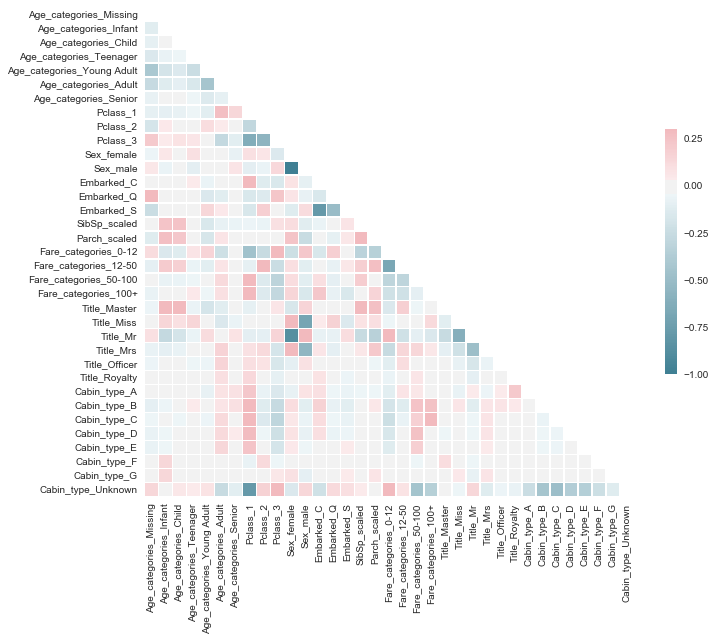

In [30]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_Unknown']

plot_correlation_heatmap(train[columns])

We can see that there is a high correlation between Sex_female/Sex_male and Title_Miss/Title_Mr/Title_Mrs. We will remove the columns Sex_female and Sex_male since the title data may be more nuanced.

Apart from that, we should remove one of each of our dummy variables to reduce the collinearity in each. We'll remove:

- Pclass_2
- Age_categories_Teenager
- Fare_categories_12-50
- Title_Master
- Cabin_type_A

In an earlier step, we manually used the logit coefficients to select the most relevant features. An alternate method is to use one of scikit-learn's inbuilt feature selection classes. We will be using the feature_selection.RFECV class which performs recursive feature elimination with cross-validation.

The RFECV class starts by training a model using all of your features and scores it using cross validation. It then uses the logit coefficients to eliminate the least important feature, and trains and scores a new model. At the end, the class looks at all the scores, and selects the set of features which scored highest.

Like the LogisticRegression class, RFECV must first be instantiated and then fit. The first parameter when creating the RFECV object must be an estimator, and we need to use the cv parameter to specific the number of folds for cross-validation.

    from sklearn.feature_selection import RFECV
    lr = LogisticRegression()
    selector = RFECV(lr,cv=10)
    selector.fit(all_X,all_y)

Once the RFECV object has been fit, we can use the RFECV.support_ attribute to access a boolean mask of True and False values which we can use to generate a list of optimized columns:

    optimized_columns = all_X.columns[selector.support_]

<b>Instructions</b><br>
- Instantiate a LogisticRegression() object, lr.
- Instantiate a RFECV() object selector using the newly created lr object and cv=10 as parameters.
- Use the fit() method to fit selector using all_X and all_y
- Use the support_ attribute selector to subset all_X.columns, and assign the result to optimized_columns.

In [31]:
from sklearn.feature_selection import RFECV

In [32]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_Unknown']

all_X = train[columns]
all_y = train["Survived"]

lr = LogisticRegression()
selector = RFECV(lr, cv=10)
selector.fit(all_X, all_y)

optimized_columns = all_X.columns[selector.support_]

In [33]:
optimized_columns

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')

Let's train a model using cross validation using these columns and check the score.

<b>Instructions</b><br>
- Instantiate LogisticRegression() object.
- Use the model_selection.cross_val_score() function and assign the results to scores, using:
all_X and all_y.
- A cv parameter of 10.
- Calculate the mean of the cross validation scores and assign the results to accuracy.

In [34]:
all_X = train[optimized_columns]
all_y = train["Survived"]

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(scores)

print('Accuracy:', accuracy)

Accuracy: 0.8226549199863807


This four-feature model scores 82.3%, a modest improvement compared to the 81.5% from our earlier model. Let's train these columns on the holdout set, save a submission file and see what score we get from Kaggle.

<b>Instructions</b><br>
- Instantiate a LogisticRegression() object and fit it using all_X and all_y.
- Use the predict() method to make predictions using the same columns in the holdout dataframe, and assign the result to holdout_predictions.
- Create a dataframe submission with two columns:
    - PassengerId, with the values from the PassengerId column of the holdout dataframe.
    - Survived, with the values from holdout_predictions.
- Use the DataFrame.to_csv method to save the submission dataframe to the filename submission_2.csv.

In [35]:
lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[optimized_columns])

submission = pd.DataFrame({'PassengerId': holdout['PassengerId'],
                           'Survived': holdout_predictions})

submission.to_csv('submission_2.csv', index=False)

You can download the submission file we just created here and submit it to Kaggle. The score this submission gets is 78.0%, which is equivalent to a jump of roughly 1,000 spots (again, this will vary as submission are constantly being made to the leaderboard).

By preparing, engineering and selecting features, we have increased our accuracy by 2.4%. When working in Kaggle competitions, you should spend a lot of time experimenting with features, particularly feature engineering.

Here are some ideas that you can use to work with features for this competition:

- Use SibSp and Parch to explore total relatives onboard.
- Create combinations of multiple columns, for instance Pclass + Sex.
- See if you can extract useful data out of the Ticket column.
- Try different combinations of features to see if you can identify features that overfit less than others.
- In the next mission in this course, we'll look at selecting and optimizing different models to improve our score.

# Model Selection and Tuning

In the previous mission, we worked to optimize our predictions by creating and selecting the features used to train our model. The other half of the optimization puzzle is to optimize the model itself— or more specifically, the algorithm used to train our model.

So far, we've been using the logistic regression algorithm to train our models, however there are hundreds of different machine learning algorithms from which we can choose. Each algorithm has different strengths and weaknesses, and so we need to select the algorithm that works best with our specific data— in this case our Kaggle competition.

The process of selecting the algorithm which gives the best predictions for your data is called model selection.

In this mission, we're going work with two new algorithms: k-nearest neighbors and random forests.

Before we begin, we'll need to import in the data. To save time, we have saved the features we created in the previous mission as CSV files, train_modified.csv and holdout_modified.csv.

In [36]:
# Instead just use the same features in the train_modified and holdout_modified dfs.

train_columns = ['Survived', 'PassengerId', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_scaled', 'Parch_scaled', 'Fare_scaled',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_Unknown']

holdout_columns = ['PassengerId', 'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Cabin_type_A',
       'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E',
       'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_Unknown']

In [37]:
train = train[train_columns]
holdout = holdout[holdout_columns]

We're going to train our models using all the columns in the train dataframe. This will cause a small amount of overfitting due to collinearity (as we discussed in the previous mission), but having more features will allow us to more thoroughly compare algorithms.

So we have something to compare to, we're going to train a logistic regression model like in the previous two missions. We'll use cross validation to get a baseline score.

<b>Instructions</b><br>
- Instantiate a linear_model.LogisticRegression class.
- Use the model_selection.cross_val_score() function to train and test a model assigning the result to scores, using:
    - The LogisticRegression object you just created
    - all_X and all_y as the the X and y parameters
    - 10 folds
- Calculate the mean of scores and assign the result to accuracy_lr.

In [38]:
all_X = train.drop(['Survived','PassengerId'], axis=1)
all_y = train['Survived']

In [39]:
lr = LogisticRegression()

scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy_lr = np.mean(scores)
print('Accuracy (LogReg):', accuracy_lr)

Accuracy (LogReg): 0.823891442515038


The logistic regression baseline model from the previous screen scored 82.4%.

<img src='kaggle/fig16.jpg', height=124, width=540>

The logistic regression algorithm works by calculating linear relationships between the features and the target variable and using those to make predictions. Let's look at an algorithm that makes predictions using a different method.

The k-nearest neighbors algorithm finds the observations in our training set most similar to the observation in our test set, and uses the average outcome of those 'neighbor' observations to make a prediction. The 'k' is the number of neighbor observations used to make the prediction.

The plots below shows three simple k-nearest neighbors models where there are two features shown on each axis, and two outcomes, red and green.

<img src='kaggle/fig17.svg'>

Simple k-nearest-neighbors classification algorithm

- In the first plot, the value of k is 1, so the closest 1 neighbour to our gray dot is used, green, making the prediction green.
- In the second plot, the value of k is 3, so the closest 3 neighbours to our gray dot are used, green, making the prediction red (2 red vs 1 green).
- In the third plot, the value of k is 5, so the closest 5 neighbours to our gray dot are used, green, making the prediction red (3 red vs 2 green).
- If you'd like to learn more about the k-nearest neighbors algorithm, you might like to check out our free Introduction to K-Nearest Neighbors mission.

Just like it does for logistic regression, scikit-learn has a class that makes it easy to use k-nearest neighbors to make predictions, neighbors.KNeighborsClassifier.

Scikit-learn's use of object-oriented design makes it easy to substitute one model for another. The syntax to instantiate a KNeighborsClassifier is very similar to the syntax we use for logistic regression.

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=1)

The optional n_neighbors argument sets the value of k when predictions are made. The default value of n_neighbors is 5, but we're going to start by building a simple model that uses the closest neighbor to make our predictions.

<b>Instructions</b><br>
- Instantiate a neighbors.KNeighborsClassifier object, setting the n_neighbors argument to 1.
- Use the model_selection.cross_val_score() function to train and test a model assigning the result to scores, using:
    - The KNeighborsClassifier object you just created.
    - all_X and all_y as the the X and y parameters.
    - 10 folds.
- Calculate the mean of scores and assign the result to accuracy_knn.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, all_X, all_y, cv=10)
accuracy_knn = np.mean(scores)
print('Accuracy (KNN):', accuracy_knn)

Accuracy (KNN): 0.7846146861877199


The k-nearest neighbors model we trained in the previous screen had an accuracy score of 78.6%, worse than our baseline score of 82.4%.

<img src='kaggle/fig18.jpg', height=150, width=570>

Besides pure model selection, we can vary the settings of each model— for instance the value of k in our k-nearest neighbors model. This is called hyperparameter optimization.

We can use a loop and Python's inbuilt range() class to iterate through different values for k and calculate the accuracy score for each different value. We will only want to test odd values for k to avoid ties, where both 'survived' and 'died' outcomes would have the same number of neighbors.

This is the syntax we would use to get odd values between 1-7 from range():

    >>>  for k in range(1,8,2):
    ...      print(k)
         1
         3
         5
         7

Note that we use the arguments (1,8,2) to get values between 1 and 7, since the created range() object contains numbers up to but not including the 8.

Let's use this technique to calculate the accuracy of our model for values of k from 1-49, storing the results in a dictionary.

To make the results easier to understand, we'll finish by plotting the scores. We have provided a helper function, plot_dict() which you can use to easily plot the dictionary.

<i>Note that we expect this step to take a while to run, as we are training 250 models in total (10 cross validation models for each of 25 values of k).</i>

<b>Instructions</b><br>
- Use a for loop and the range class to iterate over odd values of k from 1-49, and in each iteration:
    - Instantiate a KNeighborsClassifier object with the value of k for the n_neighbors argument.
    - Use cross_val_score to create a list of scores using the newly created KNeighborsClassifier object, using all_X, all_y, and cv=10 as the arguments.
    - Calculate the mean of the list of scores.
    - Add the mean of the scores to the dictionary knn_scores, using k for the key.
- Use the plot_dict() helper function to plot the knn_scores dictionary.

In [42]:
def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6), ylim=(0.78,0.83),rot=0)
    plt.show()

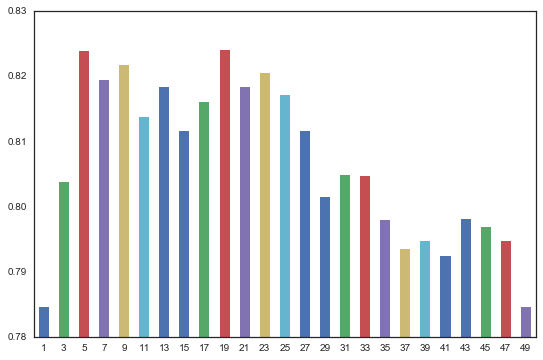

In [43]:
knn_scores = dict()

for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, all_X, all_y, cv=10)
    mean_score = np.mean(scores)
    knn_scores[k] = mean_score
    
plot_dict(knn_scores)

Looking at our plot from the previous screen we can see that a k value of 19 gave us our best score, and checking the knn_scores dictionary we can see that the score was 82.4%, identical to our baseline (if we didn't round the numbers you would see that it's actually 0.01% less accurate).

<img src='kaggle/fig19.jpg', height=205, width=580>

The technique we just used is called grid search - we train a number of models across a 'grid' of values and then searched for the model that gave us the highest accuracy.

Scikit-learn has a class to perform grid search, model_selection.GridSearchCV(). The 'CV' in the name indicates that we're performing both grid search and cross validation at the same time.

By creating a dictionary of parameters and possible values and passing it to the GridSearchCV object you can automate the process. Here's what the code from the previous screen would look like, when implemented using the GridSearchCV class.

    from sklearn.model_selection import GridSearchCV

    knn = KNeighborsClassifier()

    hyperparameters = {
        "n_neighbors": range(1,50,2)
    }
    grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
    grid.fit(all_X, all_y)

    print(grid.best_params_)
    print(grid.best_score_)

Running this code will produce the following output:

    {'n_neighbors': 19}
    0.82379349046

Our final step was to print the GridSearchCV.best_params_ and GridSearchCV.best_score_ attributes to retrieve the parameters of the best-performing model, and the score it achieved.

We can also use GridSearchCV to try combinations of different hyperparameters. Say we wanted to test values of "ball_tree", "kd_tree", and "brute" for the algorithm parameter and values of 1, 3, and 5 for the n_neighbors algorithm parameter. GridSearchCV would train and test 9 models (3 for the first hyperparameter times 3 for the second hyperparameter), shown in the diagram below.

<img src='kaggle/fig20.svg'>

Let's use GridSearchCV to turbo-charge our search for the best performing parameters for our model, by testing 40 combinations of three different hyperparameters.

We have chosen the specific hyperparameters by consulting the documentation for the KNeighborsClassifier class.

<b>Instructions</b>
- Instantiate a KNeighborsClassifier object.
- Instantiate a GridSearchCV object, using:
    - The KNeighborsClassifier object you just created as the first (unnamed) argument
    - The hyperparameters dictionary for the param_grid
    - A cv of 10
- Fit the GridSearchCV object using all_X and all_y.
- Assign the parameters of the best performing model to best_params
- Assign the score of the of the best performing model to best_score

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

print('Best Parameters:', best_params)
print('Best Score:', best_score)

Best Parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Score: 0.8282828282828283


The cross-validation score for the best performing model was 82.8%, better than our baseline model.

<img src='kaggle/fig21.jpg', height=283, width=586>

We can use the GridSearchCV.best_estimator_ attribute to retrieve a trained model with the best-performing hyperparameters. This code:

    best_knn = grid.best_estimator_

is equivalent to this code where we manually specify the hyperparameters and train the model:

    best_knn = KNeighborsClassifier(p=1,algorithm='brute',n_neighbors=5,
                         weights='uniform')
    best_knn.fit(all_X,all_y)

Lets use that model to make predictions on the holdout set and submit those predictions to Kaggle to see if we have improved overall.

<b>Instructions</b><br>
- Make predictions on the data from holdout_no_id using the best_knn model, and assign the result to holdout_predictions.
- Create a dataframe submission with two columns:
    - PassengerId, with the values from the PassengerId column of the holdout dataframe.
    - Survived, with the values from holdout_predictions.
- Use the DataFrame.to_csv method to save the submission dataframe to the filename submission_1.csv.

In [46]:
holdout_no_id = holdout.drop(['PassengerId'], axis=1)

In [47]:
best_knn = grid.best_estimator_
holdout_predictions = best_knn.predict(holdout_no_id)
submission = pd.DataFrame({'PassengerId': holdout['PassengerId'],
                           'Survived': holdout_predictions})
submission.to_csv('submission_1.csv', index=False)

When you submit this to Kaggle, you'll see it scores 75.6%, less than our best submission of 78.0%. While our model could be overfitting due to including all columns, it also seems like k-nearest neighbors may not be the best algorithm choice.

<img src='kaggle/fig22.jpg', height=275, width=590>

Let's try another algorithm called random forests. Random forests is a specific type of decision tree algorithm. You have likely seen decision trees before as part of flow charts or infographics. Say we wanted to build a decision tree to help us categorize an object as either being 'hotdog' or 'not hotdog', we could construct a decision tree like the below:

<img src='kaggle/fig23.svg'>

Decision tree algorithms attempt to build the most efficient decision tree based on the training data, and then use that tree to make future predictions. If you'd like to learn about decision trees and random forests in detail, you should check out our decision trees course.

Scikit-learn contains a class for classification using the random forest algorithm, ensemble.RandomForestClassifier. Here's how to fit a model and make predictions using the RandomForestClassifier class:

    from sklearn.ensemble import RandomForestClassifier

    clf = RandomForestClassifier(random_state=1)
    clf.fit(train_X,train_y)
    predictions = clf.predict(test_X)

Because the algorithm includes randomization, we have to set the random_state parameter to make sure our results are reproducible.

Let's use a RandomForestClassifier object with cross_val_score() as we did earlier to see how the algorithm performs with the default hyperparameters.

<b>Instructions</b><br>
- Instantiate a RandomForestClassifier object, setting the random_state parameter to 1.
- Use the cross_val_score() function to generate a set of scores and assign the result to scores, using:
    - The RandomForestClassifer object you just created as the estimator
    - all_X and all_y for the train and test data
    - A cv value of 10
- Calculate the mean of scores and assign the result to accuracy_rf

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(random_state=1)
scores = cross_val_score(rf, all_X, all_y, cv=10)
accuracy_rf = np.mean(scores)
print('Accuracy (Random Forest):', accuracy_rf)

Accuracy (Random Forest): 0.8125924980138463


Using the default settings, our random forests model obtained a cross validation score of 80.7%.

<img src='kaggle/fig24.jpg', height=337, width=588>

Just like we did with the k-nearest neighbors model, we can use GridSearchCV to test a variety of hyperparameters to find the best performing model.

The best way to see a list of available hyperparameters is by checking the documentation for the classifier— in this case, the documentation for RandomForestClassifier. Let's use grid search to test out combinations of the following hyperparameters:

- criterion: "entropy" or "gini"
- max_depth: 5 or 10
- max_features: "log2" or "sqrt"
- min_samples_leaf: 1 or 5
- min_samples_split: 3 or 5
- n_estimators: 6 or 9

<b>Instructions</b><br>
- Instantiate a RandomForestClassifer object, setting the random_state parameter to 1.
- Instantiate a GridSearchCV object, using:
    - The RandomForestClassifer object you just created as the first (unnamed) argument
    - A dictionary of hyperparameters that matches the list above for the param_grid argument
    - A cv of 10.
- Fit the GridSearchCV object using all_X or all_y.
- Assign the parameters of the best performing model to best_params
- Assign the score of the of the best performing model to best_score

In [50]:
hyperparameters = {'criterion': ['entropy', 'gini'],
                   'max_depth': [5, 6, 7, 8, 9, 10],
                   'max_features': ['log2', 'sqrt'],
                   'min_samples_leaf': [1, 3, 5],
                   'min_samples_split': [3, 5, 7],
                   'n_estimators': [6, 9, 12]}

rf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(rf, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

print('Best Parameters:', best_params)
print('Best Score:', best_score)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 12}
Best Score: 0.8428731762065096


The cross-validation score for the best performing model was 84.3%, making it the best cross-validation score we've obtained in this mission.

<img src='kaggle/fig25.jpg', height=400, width=600>

Let's train it on the holdout data and create a submission file to see how it performs on the Kaggle leaderboard!

<b>Instructions</b><br>
- Assign the best performing model from the GridSearchCV object grid to best_rf.
- Make predictions on the data from holdout_no_id using the best_rf model, and assign the result to holdout_predictions.
- Create a dataframe submission with two columns:
    - PassengerId, with the values from the PassengerId column of the holdout dataframe.
    - Survived, with the values from holdout_predictions.
- Use the DataFrame.to_csv method to save the submission dataframe to the filename submission_3.csv.

In [51]:
best_rf = grid.best_estimator_
holdout_predictions = best_rf.predict(holdout_no_id)

submission = pd.DataFrame({'PassengerId': holdout['PassengerId'],
                 'Survived': holdout_predictions})

submission.to_csv("submission_3.csv", index=False)

If you submit this to Kaggle, it achieves a score of 77.1%, considerably better than our k-nearest neighbors score of 75.6% and very close (2 incorrect predictions) to our best score from the previous mission of 78.0%

<img src='kaggle/fig26.jpg', height314, width=716>

By combining our strategies for feature selection, feature engineering, model selection and model tuning, we'll be able to continue to improve our score.

The next and final mission in this course is a guided project, where we'll teach you how to combine everything you've learned into a real-life Kaggle workflow, and continue to improve your score.

# Kaggle Workflow

<b>Instructions</b><br>
- Use the %load magic command to load the contents of functions.py into a notebook cell and read through the functions you have imported.
- Create a new function, which:
    - Accepts a dataframe parameter
    - Applies the process_missing(), process_age(), process_fare(), process_titles(), and process_cabin() functions to the dataframe
    - Applies the create_dummies() function to the "Age_categories", "Fare_categories","Title", "Cabin_type", and "Sex" columns.
    - Returns the processed dataframe
    - Apply the newly create function on the train and holdout dataframes.

In [52]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")

    # There is only one passenger with Cabin type T, so change to 'Unknown'
    df['Cabin_type'].iloc[df[df['Cabin_type'] == 'T'].index] = 'Unknown'

    df = df.drop('Cabin', axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [53]:
def process_df(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    df = create_dummies(df, ["Age_categories", "Fare_categories","Title", "Cabin_type", 'Sex'])
    return df

In [54]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [55]:
train = process_df(train)
holdout = process_df(holdout)

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In the first three missions of this course, we have done a variety of activities, mostly in isolation: Exploring the data, creating features, selecting features, selecting and tuning different models.

The Kaggle workflow we are going to build will combine all of these into a process.

<img src='kaggle/fig27.svg', height=500, width=500>

- Data exploration, to find patterns in the data
- Feature engineering, to create new features from those patterns or through pure experimentation
- Feature selection, to select the best subset of our current set of features
- Model selection/tuning, training a number of models with different hyperparameters to find the best performer.

We can continue to repeat this cycle as we work to optimize our predictions. At the end of any cycle we wish, we can also use our model to make predictions on the holdout set and then Submit to Kaggle to get a leaderboard score.

While the first two steps of our workflow are relatively freeform, later in this project we'll create some functions that will help automate the complexity of the latter two steps so we can move faster.

For now, let's practice the first stage, exploring the data. We're going to examine the two columns that contain information about the family members each passenger had onboard: SibSp and Parch.

If you need some help with techniques for exploring and visualizing data, you might like to check out our Data Analysis with Pandas and Exploratory Data Visualization courses.

<b>Instructions</b><br>
- Review the data dictionary and variable notes for the Titanic competition on Kaggle's website to familiarize yourself with the SibSp and Parch columns.
- Use pandas and matplotlib to explore those two columns. You might like to try:
- Inspecting the type of the columns
- Using histograms to view the distribution of values in the columns
- Use pivot tables to look at the survival rate for different values of the columns
- Find a way to combine the columns and look at the resulting distribution of values and survival rate

In [56]:
# sibsp # of siblings and spouses aboard the Titanic
# parch # of parents and children aboard the Titanic

train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [57]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

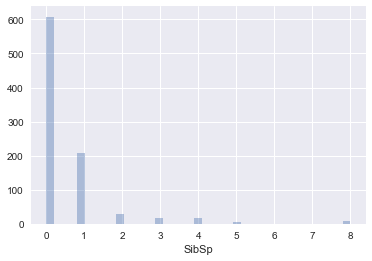

In [58]:
sns.set_style('darkgrid')
sns.distplot(train['SibSp'], kde=False)

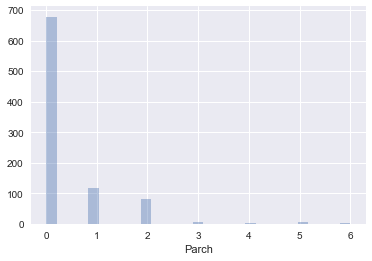

In [59]:
sns.distplot(train['Parch'], kde=False)

In [60]:
train.pivot_table(index='SibSp', values='Survived')

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [61]:
train.pivot_table(index='Parch', values='Survived')

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


You should have discovered in the previous step that by combining the values of SibSp and Parch into a single column, only 30% of the passengers who had no family members onboard survived.

If you didn't get this conclusion, you can use the code segment below to verify this for yourself:

    explore_cols = ["SibSp","Parch","Survived"]
    explore = train[explore_cols].copy()

    explore['familysize'] = explore[["SibSp","Parch"]].sum(axis=1)
    pivot = explore.pivot_table(index=col,values="Survived")
    pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1))
    plt.show()

Based on this, we can come up with an idea for a new feature - was the passenger alone. This will be a binary column containing the value:

- 1 if the passenger has zero family members onboard
- 0 if the passenger has one or more family members onboard

Let's go ahead and create this feature.

<b>Instructions</b><br>
- Create a function, that:
    - Accepts a dataframe as input
    - Adds a new column, isalone that has the value 0 if the passenger has one or more family members onboard, and 1 if the passenger has zero family members onboard.
    - Returns the new dataframe
- Apply the newly created function to the train and holdout dataframes.

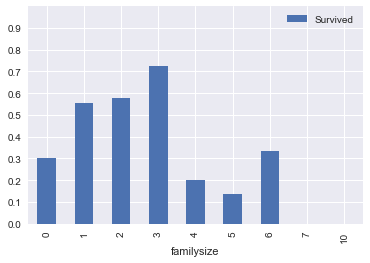

In [62]:
explore_cols = ["SibSp", "Parch", "Survived"]
explore = train[explore_cols].copy()

explore['familysize'] = explore[["SibSp", "Parch"]].sum(axis=1)
pivot = explore.pivot_table(index='familysize', values="Survived")
pivot.plot.bar(ylim=(0,1), yticks=np.arange(0,1,.1))
plt.show()

In [63]:
def isalone(df):
    """Adds a new column, iszlone, that has the value 0 if the passenger has one or more family
    members onboard, and 1 if the passenger has zero family members onboard."""
    
    family_size = df['SibSp'] + df['Parch']
    df['isalone'] = (family_size == 0) * 1
    
    return df

In [64]:
train = isalone(train)
holdout = isalone(holdout)

The next step in our workflow is feature selection. In the Feature Preparation, Selection and Engineering mission, we used scikit-learn's feature_selection.RFECV class to automate selecting the best-performing features using recursive feature elimination.

To speed up our Kaggle workflow, we can create a function that performs this step for us, which will mean we can perform feature selection by calling a self-contained function and focus our efforts on the more creative part - exploring the data and engineering new features.

You may remember that the first parameter when you instantiate a RFECV() object is an estimator. At the time we used a Logistic Regression estimator, but we've since discovered in the Model Selection and Tuning mission that Random Forests seems to be a better algorithm for this Kaggle competition.

Let's write a function that:

- Accepts a dataframe as input
- Performs data preparation for machine learning
- Uses recursive feature elimination and the random forests algorithm to find the best-performing set of features

<b>Instructions</b><br>
- Import feature_selection.RFECV and ensemble.RandomForestClassifier
- Create a function, select_features(), that:
    - Accepts a dataframe as input
    - Removes any non-numeric columns or columns containing null values
    - Creates all_X and all_y variables, making sure that all_X contains neither the PassengerId or Survived columns.
    - Uses feature_selection.RFECV and ensemble.RandomForestClassifier to perform recursive feature elimination using:
        - all_X and all_y
        - A random state of 1
        - 10 fold cross validation
    - Prints a list of the best columns from recursive feature elimination
    - Returns a list of the best columns from recursive feature elimination
- Run the newly created function using the train dataframe as input and assign the result to a variable.

In [65]:
def select_features(df):
    df = df.select_dtypes(include=['float', 'int'])
    all_X = df.drop(['PassengerId', 'Survived'], axis=1)
    all_y = df['Survived']
    
    rf = RandomForestClassifier(random_state=1)
    selector = RFECV(rf, cv=10, n_jobs=-1)
    selector.fit(all_X, all_y)
    print(all_X.columns[selector.support_])
    
    return all_X.columns[selector.support_]

In [66]:
best_features = select_features(train)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


Just like we did with feature selection, we can can write a function to do the heavy lifting of model selection and tuning. The function we'll create will use three different algorithms and use grid search to train using different combinations of hyperparameters to find the best performing model.

We can achieve this by creating a list of dictionaries— that is, a list where each element of the list is a dictionary. Each dictionary should contain:

The name of the particular model
An estimator object for the model
A dictionary of hyperparameters that we'll use for grid search.
Here's an example of what one of these dictionaries will look like:

    {
        "name": "KNeighborsClassifier",
        "estimator": KNeighborsClassifier(),
        "hyperparameters":
            {
                "n_neighbors": range(1,20,2),
                "weights": ["distance", "uniform"],
                "algorithm": ["ball_tree", "kd_tree", "brute"],
                "p": [1,2]
            }
    }

We can then use a for loop to iterate over the list of dictionaries, and for each one we can use scikit-learn's model_selection.GridSearchCV class to find the best set of performing parameters, and add values for both the parameter set and the score to the dictionary.

Finally, we can return the list of dictionaries, which will have our trained GridSearchCV objects as well as the results so we can see which was the most accurate.

<b>Instructions</b><br>
- Import model_selection.GridSearchCV, neighbors import KNeighborsClassifier, and linear_model import LogisticRegression
- Create a function, select_model(), that:
    - Accepts a dataframe and a list of features as input
    - Splits the dataframe into all_X (containing only the features in the input parameter) and all_y
    - Contains a list of dictionaries, each containing a model name, its estimator and a dictionary of hyperparameters:
        - LogisticRegression, using the following hyperparameters:
            - "solver": ["newton-cg", "lbfgs", "liblinear"
        - KNeighborsClassifier, using the following hyperparameters:
            - "n_neighbors": range(1,20,2)
            - "weights": ["distance", "uniform"]
            - "algorithm": ["ball_tree", "kd_tree", "brute"]
            - "p": [1,2]
        - RandomForestClassifier, using the following hyperparameters:
            - "n_estimators": [4, 6, 9]
            - "criterion": ["entropy", "gini"]
            - "max_depth": [2, 5, 10]
            - "max_features": ["log2", "sqrt"]
            - "min_samples_leaf": [1, 5, 8]
            - "min_samples_split": [2, 3, 5]
    - Iterate over that list of dictionaries, and for each dictionary:
        - Print the name of the model.
        - Instantiate a GridSearchCV() object using the model, the dictionary of hyperparameters and specify 10 fold cross validation.
        - Fit the GridSearchCV() object using all_X and all_y.
        - Assign the parameters and score for the best model to the dictionary.
        - Assign the best estimator for the best model to the dictionary.
        - Print the the parameters and score for the best model.
        - Return the list of dictionaries
- Run the newly created function using the train dataframe and the output of select_features() as inputs and assign the result to a variable.

In [67]:
def select_model(df, features):
    all_X = df[features]
    all_y = df['Survived']
    
    models = [{'name': 'LogisticRegression',
              'estimator': LogisticRegression(),
              'hyperparameters':
               {
                   'solver': ['newton-cg', 'lbfgs', 'liblinear']
               }
              },
              {"name": "KNeighborsClassifier",
               "estimator": KNeighborsClassifier(),
               "hyperparameters":
               {
                   "n_neighbors": range(1, 20, 2),
                   "weights": ["distance", "uniform"],
                   "algorithm": ["ball_tree", "kd_tree", "brute"],
                   "p": [1,2]
               }
              },
             {'name': 'RandomForestClassifier',
             'estimator': RandomForestClassifier(),
             'hyperparameters':
              {
                  'n_estimators': [4, 6, 9],
                  'criterion': ['entropy', 'gini'],
                  'max_depth': [2, 5, 10],
                  'max_features': ['log2', 'sqrt'],
                  'min_samples_leaf': [1, 5, 8],
                  'min_samples_split': [2, 3, 5]
              }
             }]
    
    for model in models:
        print(model['name'] + ':')
        grid = GridSearchCV(estimator=model['estimator'], param_grid=model['hyperparameters'], cv=10)
        grid.fit(all_X, all_y)
        model['best_params'] = grid.best_params_
        model['best_estimator'] = grid.best_estimator_
        model['best_score'] = grid.best_score_
        print('\tBest Parameters:', model['best_estimator'])
        print('\tBest Score:', model['best_score'])
        
    return models

In [68]:
models = select_model(train, best_features)

LogisticRegression:
	Best Parameters: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
	Best Score: 0.7014590347923682
KNeighborsClassifier:
	Best Parameters: KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=1,
           weights='distance')
	Best Score: 0.6980920314253648
RandomForestClassifier:
	Best Parameters: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbo

After running your function, you will have three scores from three different models. At this point in the workflow you have a decision to make: Do you want to train your best model on the holdout set and make a Kaggle submission, or do you want to go back to engineering features.

You may find that adding a feature to your model doesn't improve your accuracy. In that case you should go back to data exploration and repeat the cycle again.

If you're going to be continually submitting to Kaggle, a function will help make this easier. Let's create a function to automate this.

Note that in our Jupyter Notebook environment, the DataFrame.to_csv() method will save the CSV in the same directory as your notebook, just as it would if you are running Jupyter locally. To download the CSV from our environment, you can either click the 'download' button to download all of your project files as a tar file, or click the Jupyter logo at the top of the interface, and navigate to the CSV itself to download just that file.

<b>Instructions</b>
- Create a function, save_submission_file(), that:
    - Accepts a trained model and a list of columns as required arguments, and an optional filename argument
    - Uses the model to make predictions on the holdout dataframe using the columns specified.
    - Transforms the predictions into a submission dataframe with PassenderID and Survived columns as specified by Kaggle
    - Saves that dataframe to a CSV file with either a default filename, or the filename specified by the optional argument
- Retrieve the best performing model from the variable returned by select_model().
- Use save_submission_file() to save out a CSV of predictions.
- Download that file and submit it to Kaggle.

In [69]:
def save_submission_file(model, holdout, filename='submission.csv'):
    prediction = model.predict(holdout)
    submission = pd.DataFrame({'PassengerId': holdout['PassengerId'],
                              'Survived': prediction})
    submission.to_csv(filename)